In [138]:
import numpy as np

In [139]:
X = np.load('./data/features.npy')
Y = np.load('./data/labels.npy')

In [140]:
from keras.utils.np_utils import to_categorical

num_samples = X.shape[0]
index=np.arange(num_samples)
np.random.shuffle(index)
tx = X
ty = Y
for i in range(num_samples):
    X[i] = tx[index[i]]
    Y[i] = ty[index[i]]

Y = to_categorical(Y, 361)

In [141]:
X.shape

(6562, 19, 19, 1)

In [142]:

Y.shape

(6562, 361)

In [143]:
board_size = 19
input_shape = (board_size,board_size,1)
 

train_num_samples = int(0.9*num_samples)
X_train,X_test = X[:train_num_samples],X[train_num_samples:]
Y_train,Y_test = Y[:train_num_samples],Y[train_num_samples:]

In [144]:

model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),activation="relu",padding='same',input_shape=input_shape))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding='same'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate=0.5))
model.add(Flatten())

model.add(Dense(300,activation="relu"))
model.add(Dropout(rate=0.5))
model.add(Dense(board_size*board_size,activation="softmax"))

model.summary()


Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 19, 19, 32)        320       
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 19, 19, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 9, 9, 64)          0         
_________________________________________________________________
dropout_42 (Dropout)         (None, 9, 9, 64)          0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 5184)              0         
_________________________________________________________________
dense_46 (Dense)             (None, 300)               1555500   
_________________________________________________________________
dropout_43 (Dropout)         (None, 300)             

In [145]:
import keras.backend as K
from keras.callbacks import LearningRateScheduler
 
def scheduler(epoch):
    # 每隔100个epoch，学习率减小为原来的1/10
    if epoch % 10 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.5)
        print("lr changed to {}".format(lr * 0.5))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

In [154]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])


history = model.fit(X_train,Y_train,batch_size=64,epochs=80,verbose=1,validation_data=(X_test,Y_test), callbacks=[reduce_lr])

score = model.evaluate(X_test,Y_test,verbose=1)

print("loss:",score[0])
print("accuracy:",score[1])

Epoch 1/80
93/93 [==============================] - 5s 58ms/step - loss: 1.4906 - accuracy: 0.5429 - val_loss: 1.3284 - val_accuracy: 0.6728 - lr: 0.0010
Epoch 2/80
93/93 [==============================] - 6s 64ms/step - loss: 1.5171 - accuracy: 0.5372 - val_loss: 1.3829 - val_accuracy: 0.6560 - lr: 0.0010
Epoch 3/80
93/93 [==============================] - 6s 64ms/step - loss: 1.4943 - accuracy: 0.5448 - val_loss: 1.3970 - val_accuracy: 0.6621 - lr: 0.0010
Epoch 4/80
93/93 [==============================] - 5s 58ms/step - loss: 1.4923 - accuracy: 0.5483 - val_loss: 1.3628 - val_accuracy: 0.6849 - lr: 0.0010
Epoch 5/80
93/93 [==============================] - 5s 56ms/step - loss: 1.4964 - accuracy: 0.5456 - val_loss: 1.3712 - val_accuracy: 0.6454 - lr: 0.0010
Epoch 6/80
93/93 [==============================] - 6s 63ms/step - loss: 1.5004 - accuracy: 0.5446 - val_loss: 1.3584 - val_accuracy: 0.6651 - lr: 0.0010
Epoch 7/80
93/93 [==============================] - 5s 57ms/step - loss: 1.4

Epoch 52/80
93/93 [==============================] - 6s 62ms/step - loss: 1.0113 - accuracy: 0.6679 - val_loss: 1.1768 - val_accuracy: 0.7778 - lr: 3.1250e-05
Epoch 53/80
93/93 [==============================] - 5s 57ms/step - loss: 1.0178 - accuracy: 0.6622 - val_loss: 1.1759 - val_accuracy: 0.7839 - lr: 3.1250e-05
Epoch 54/80
93/93 [==============================] - 6s 62ms/step - loss: 1.0098 - accuracy: 0.6657 - val_loss: 1.1741 - val_accuracy: 0.7900 - lr: 3.1250e-05
Epoch 55/80
93/93 [==============================] - 7s 71ms/step - loss: 1.0034 - accuracy: 0.6625 - val_loss: 1.1748 - val_accuracy: 0.7884 - lr: 3.1250e-05
Epoch 56/80
93/93 [==============================] - 6s 63ms/step - loss: 1.0125 - accuracy: 0.6676 - val_loss: 1.1727 - val_accuracy: 0.7854 - lr: 3.1250e-05
Epoch 57/80
93/93 [==============================] - 7s 70ms/step - loss: 0.9996 - accuracy: 0.6698 - val_loss: 1.1728 - val_accuracy: 0.7854 - lr: 3.1250e-05
Epoch 58/80
93/93 [===========================

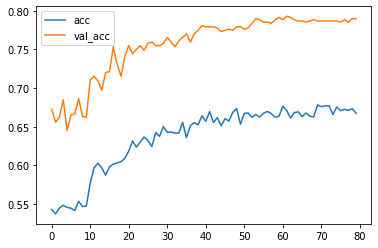

In [155]:
import matplotlib.pyplot as plt
epochs = len(history.history['loss'])
plt.plot(range(epochs), history.history['accuracy'], label='acc')
plt.plot(range(epochs), history.history['val_accuracy'], label='val_acc')
#plt.plot(range(epochs), history.history['loss'], label='loss')
#plt.plot(range(epochs), history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
